# Neste projeto aplicaremos técnicas de tratamento de valores ausentes para análise de dados de campanhas de Marketing de instituições financeiras.

# Tratamento de Valores Ausentes

- Valores ausentes representam um problema e devem ser tratados.
- O valor ausente representa falta de informação e não necessariamente falta de dados.
- A remoção deve ser usada se a variável tem 30% ou mais de valores ausentes, caso contrário usamos imputação.

# Qual a Melhor Estratégia de Tratamento de Valores Ausentes?

- Não existe estratégia ideal para tratar valores ausentes.
- Devemos analisar sempre cada cenário, cada problema e cada conjunto de dados e tentar gerar o menor impacto possível na limpeza dos dados.
- Mas podemos facilmente identificar quais estratégias não devem ser usada ou devem ser evitadas:
- Não preencha valores ausentes com valores aleatórios ou sem critério.
- Não use a média para preencher valores ausentes de uma variável quantitativa se esta não aprensetar uma distribuição normal (moda e mediana seriam opções nesse cenário).
- Não invente categorias para tratar variáveis qualitativas (use termos como "desconhecida" ou "outros", por exemplo).

# Técnicas de Imputação de Variáveis Quantitativas

- A  imputação  para  variáveis  quantitativas  visa  substituir  valores  ausentes  por  valores numéricos que representem a informação contida na variável.
- A principal técnica de imputação nesse caso é usar uma medida de tendência central da variável e então imputar os valores ausentes com essa medida. As medidas de tendência central são: média, mediana e moda.
- A média é a média aritmética dos valores da variável. Normalmente usamos a média quando a variável segue uma distribuição normal e não tem outliers(valores além de 1.5 a 3 acima ou abaixo do intervalo interquartil).
- A mediana é  o  valor  do  meio  da distribuição quando  os  dados  estão  ordenados. Normalmente usamos a mediana quando a média não pode ser usada.
- A moda é o valor que parece com mais frequência na variável e pode ser uma opção quando a média não puder ser usada.
- Outra técnica para imputação de variáveis quantitativas é usar o forward ou backward fill preenchendo o valor ausente com o último valor válido, fazendo isso para frente (forward) ou para trás (backward).
- Podemos ainda usar Machine Learning para prever o valor ausente e então realizar a imputação.

# Técnicas de Imputação de Variáveis Qualitativas

- Para variáveis qualitativas não podemos usar medidas de tendência central, pois essas medidas são calculas para variáveis quantitativas.
- A  técnica mais  comum  com variáveis  qualitativas é a  imputação  múltipla,  quando verificamos os valores ausentes e checamos as regras associadas a outras variáveis. 
- Por exemplo: Uma variável cor do automóvel tem como categorias azul, prata e branco e possui  valores ausentes.  Podemos  verificar  uma  outra  variável chamada potencia_motor e verificar qual a cor associada e então preencher o valor ausente com base nessa regra.
- Outra alternativa é criar uma nova categoria e preencher os valores ausentes. No exemplo da cor do carro poderíamos preencher o valor ausente com “Não Definido”, por exemplo.
- Podemos ainda preencher o valor ausente com a categoria mais frequente. No exemplo da cor do automóvel, considerando que prata seja a cor que apareceu mais vezes nos registros, usaríamos essa categoria para preencher os valores ausentes.

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas    : 1.3.4
seaborn   : 0.11.2
matplotlib: 3.4.3
sys       : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
numpy     : 1.20.3



In [4]:
# Vamos adicionar caminho para os módulos Python
sys.path.append(os.path.abspath(os.path.join('modulos')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

## Carregando os Dados

In [5]:
# Carrega o dataset
df = pd.read_csv("dados/dataset.csv") 

In [6]:
df.shape

(45211, 19)

In [7]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


## Análise Exploratória

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [9]:
df.isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [10]:
df.isna().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [11]:
func_calc_percentual_valores_ausentes(df)

O dataset tem 0.01 % de valores ausentes.


In [12]:
# Não usaremos a coluna ID. Vamos removê-la.
df.drop(["customerid"], axis = 1, inplace = True)

In [13]:
# Colunas
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

- A coluna jobedu possui um problema, quando foi criado o dataset, colocaram duas informações em uma variável, será necessário separar essas informações em duas variáveis diferentes.

In [14]:
df[['job', 'education']] = df['jobedu'].str.split(',', expand=True)

In [15]:
df.drop(['jobedu'], axis = 1, inplace = True)

In [16]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


## Tratamento de Valores Ausentes

- Vamos primeiro tratar a variável que representa a idade.

In [17]:
# Valores ausentes no dataframe
df.isna().any()

age           True
salary        True
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month         True
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [18]:
# Valores ausentes da variável age
df.age.isnull().sum()

20

In [19]:
# Calcula o percentual de valores ausentes na variável age
df.age.isnull().mean()*100

0.0442370219636814

- Como o percentual é baixo não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 20 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

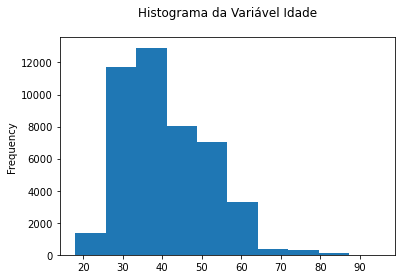

In [20]:
# Histograma
df.age.plot(kind = "hist")
plt.title("Histograma da Variável Idade\n")
plt.show()

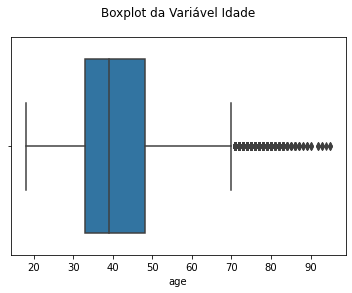

In [21]:
# Boxplot
sns.boxplot(df.age)
plt.title("Boxplot da Variável Idade\n")
plt.show()

In [22]:
# Vamos verificar qual é a média de idade.
df.age.mean()

40.93565090394105

In [23]:
# Vamos verificar qual é a mediana, valor do meio da distribuição quando os dados estão ordenados.
df.age.median()

39.0

In [24]:
# Vamos verificar qual é a moda, o valor que aparece com mais frequência.
df.age.mode()

0    32.0
dtype: float64

- Estarei realizando a imputação dos valores ausentes, utilizando a moda, por que é o valor que aparece com mais frequência

In [25]:
# Imputando os valores ausentes utilizando o valor da moda.
df.age.fillna('32', inplace = True)

In [30]:
# Convertendo a variável do tipo float para INT, pois não faz sentido uma variável de idade ter valor float
df.age = df.age.astype("int64")

In [31]:
# Verificando se foi convertido
df.age.dtypes

dtype('int64')

In [32]:
# Vamos verificar qual é a média de idade.
df.age.mean()

40.93169803808808

In [33]:
# Vamos verificar qual é a mediana, valor do meio da distribuição quando os dados estão ordenados.
df.age.median()

39.0

In [35]:
# Calcula o percentual de valores ausentes na variável age
df.age.isnull().mean()*100

0.0

- Vamos agora tratar a variável que representa o mês.

In [36]:
# Valores ausentes na variável
df.month.isnull().sum()

50

In [37]:
# Percentual de valores ausentes
df.month.isnull().mean()*100

0.11059255490920351

- Como o percentual é menor que 30% não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 50 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

In [38]:
# Tipo da variável
df.month.dtypes

dtype('O')

In [39]:
# Categorias da variável
df.month.value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [40]:
# Vamos imputar os valores ausentes utilizando a moda, veja que a mediana e a média não pode ser utilizandos para imputação
# de variáveis categoricas, mas a moda permite isso.
df.month.mode()

0    may, 2017
dtype: object

In [41]:
# Imputação com a moda
df.month.fillna('may, 2017', inplace = True)

In [42]:
# Valores ausentes tratados com sucesso
df.month.isnull().sum()

0

- Vamos agora tratar a variável que representa o salário.

In [43]:
# Valores ausentes na variável
df.salary.isnull().sum()

26

In [44]:
# Calcula o percentual de valores ausentes na variável salary
df.salary.isnull().mean()*100

0.05750812855278583

- Como o percentual é baixo não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 26 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção.

In [45]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


- Existe salário igual a zero? Não. O valor zero é provavelmente um valor ausente (confirmar com a área de negócio).

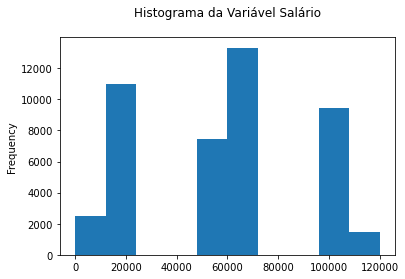

In [46]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

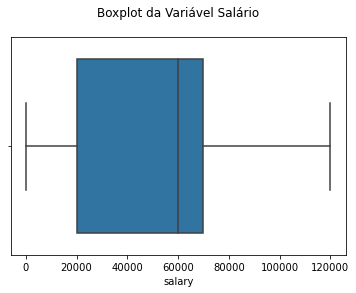

In [47]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [48]:
# Vamos verificar qual é a média de idade.
df.salary.mean()

57008.65331415293

In [49]:
# Vamos verificar qual é a mediana.
df.salary.median()

60000.0

In [50]:
# Vamos verificar qual é a moda.
df.salary.mode()

0    20000.0
dtype: float64

- Vamos imputar os valores ausentes da variável salary com uma medida de tendência central. Precisamos também tratar os valores iguais a zero.

In [51]:
# Vamos preencher com a mediana pois os dados parecem assimétricos (nesse caso a média não pode ser usada)
# e o valor mais frequente (moda) está muito abaixo da média e da mediana (por isso não usaremos a moda)
df.salary.fillna('60000', inplace = True)

In [52]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [53]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

TypeError: no numeric data to plot

Veja a menssagem de erro que aparece logo acima foi pelo motivo que ao tratar os valores ausentes utilizamos aspas '60000'
neste momento o python entendeu que eu gostaria de converter a variável do tipo float para object, não tem problema iremos 
converter novamente a variável para o tipo float.

In [55]:
# verificando o tipo da variável
df.salary.dtypes

dtype('O')

In [56]:
# Convertendo o tipo da variável
df.salary = df.salary.astype('float')

In [58]:
# verificando o tipo da variável
df.salary.dtypes

dtype('float64')

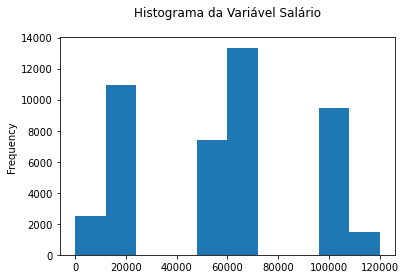

In [57]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

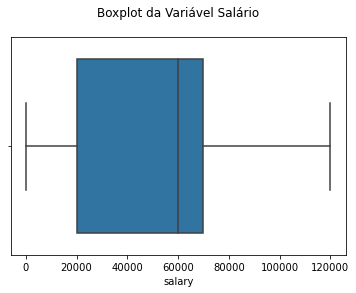

In [59]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [60]:
# Registros para cada salário
df.salary.value_counts()

20000.0     9725
100000.0    9454
60000.0     9195
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
0.0          288
Name: salary, dtype: int64

- Vou utilizar a mesma estratégia para mudar o valor 0, estarei imputando com a mediana

In [61]:
# Replace do 0 para a mediana
df['salary'] = df['salary'].replace(0, df['salary'].median())

In [62]:
# Registros para cada salário
df.salary.value_counts()

20000.0     9725
60000.0     9483
100000.0    9454
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
Name: salary, dtype: int64

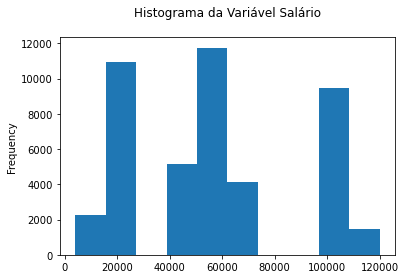

In [63]:
# Histograma
df.salary.plot(kind = "hist")
plt.title("Histograma da Variável Salário\n")
plt.show()

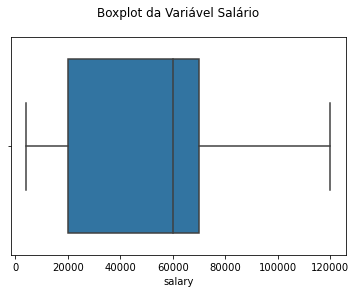

In [64]:
# Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário\n")
plt.show()

In [65]:
# Calcula o percentual de valores ausentes na variável salary
df.salary.isnull().mean()*100

0.0

In [66]:
df.isna().any()

age          False
salary       False
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

- Vamos agora tratar a variável que representa a resposta (variável alvo).

In [67]:
#Valores ausentes
df.response.isnull().sum()

30

In [68]:
# Calculando o percentual
df.response.isnull().mean()*100

0.0663555329455221

- Como o percentual é baixo (e a variável é o alvo da nossa análise) não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (nesse caso perderíamos 30 linhas no dataset) ou podemos aplicar imputação.

In [74]:
# Não devemos aplicar imputação na variável de estudo (variável resposta ou variável alvo)
# Vamos dropar os registros
df.dropna(subset = ['response'], inplace = True)

In [75]:
# Verificando os valores NA
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

In [76]:
df.pdays.describe()

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indica valor ausente

- O describe deve ser feito para cada variável numérica. e para as variáveis categoricas o value_counts()

In [77]:
# Vamos fazer relace de -1 por NaN
df.pdays = df.pdays.replace({-1.0:np.NaN})

In [78]:
# Valores ausentes
df.pdays.isnull().sum()

36930

In [79]:
# Calcula o percentual
df.pdays.isnull().mean()*100

81.73789867422147

- Quando uma variável possui um valor tão alto de valores ausentes, o correto é dropar a variável

In [80]:
func_calc_percentual_valores_ausentes(df)

O dataset tem 4.3 % de valores ausentes.


In [82]:
df = df.drop('pdays', axis = 1)

In [83]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,0,unknown,no,blue-collar,unknown
4,33,60000.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,0,unknown,no,unknown,unknown


In [84]:
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

## Conclusão e Análise dos Dados

### Análise Univariada

In [85]:
# Proporção da variável de estado civil
df.marital.value_counts(normalize = True)

married     0.601912
single      0.282907
divorced    0.115181
Name: marital, dtype: float64

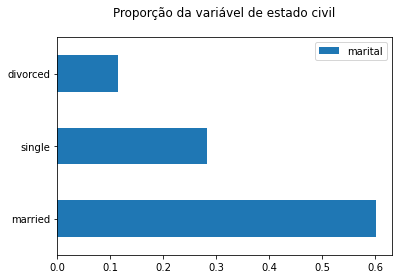

In [86]:
# Plot
df.marital.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da variável de estado civil\n")
plt.legend()
plt.show()

In [87]:
# Proporção da variável de job
df.job.value_counts(normalize = True)

blue-collar      0.215290
management       0.209247
technician       0.168035
admin.           0.114340
services         0.091853
retired          0.050087
self-employed    0.034860
entrepreneur     0.032890
unemployed       0.028840
housemaid        0.027423
student          0.020761
unknown          0.006374
Name: job, dtype: float64

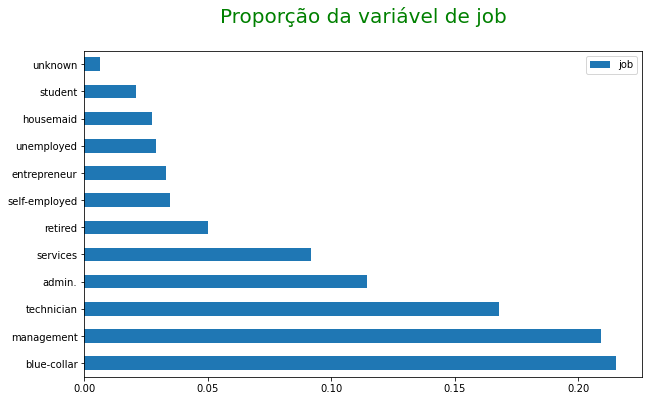

In [88]:
# Plot
plt.figure(figsize = (10,6))
df.job.value_counts(normalize = True).plot(kind = "barh")
plt.title("Proporção da variável de job\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.show()

In [89]:
# Proporção da variável de education
df.education.value_counts(normalize = True)

secondary    0.513247
tertiary     0.294194
primary      0.151480
unknown      0.041079
Name: education, dtype: float64

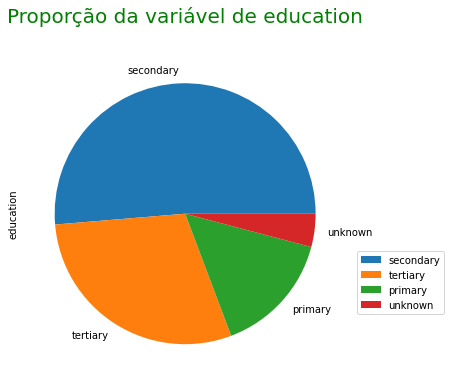

In [90]:
# Plot
plt.figure(figsize = (10,6))
df.education.value_counts(normalize = True).plot(kind = "pie")
plt.title("Proporção da variável de education\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

In [91]:
# Proporção da variável response
df.response.value_counts(normalize = True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

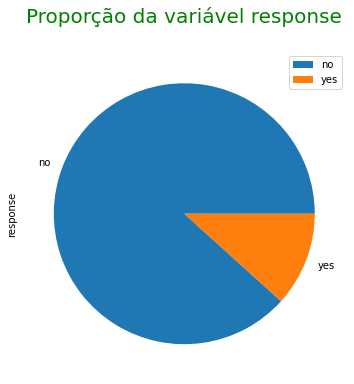

In [92]:
# Plot
plt.figure(figsize = (10,6))
df.response.value_counts(normalize = True).plot(kind = "pie")
plt.title("Proporção da variável response\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.legend()
plt.show()

## Análise Multivariada

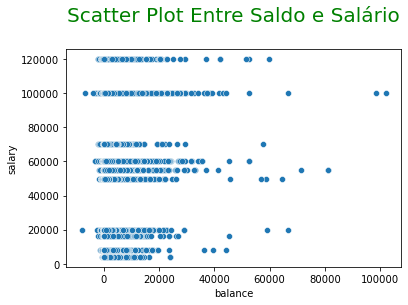

In [93]:
# Scatter Plot
sns.scatterplot(df["balance"], df["salary"])
plt.title("Scatter Plot Entre Saldo e Salário\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

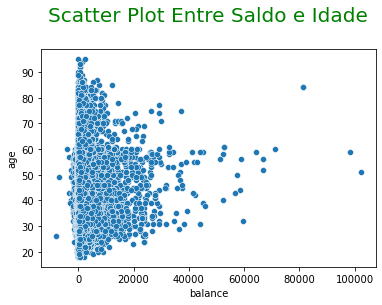

In [94]:
# Scatter Plot
sns.scatterplot(df["balance"], df["age"])
plt.title("Scatter Plot Entre Saldo e Idade\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

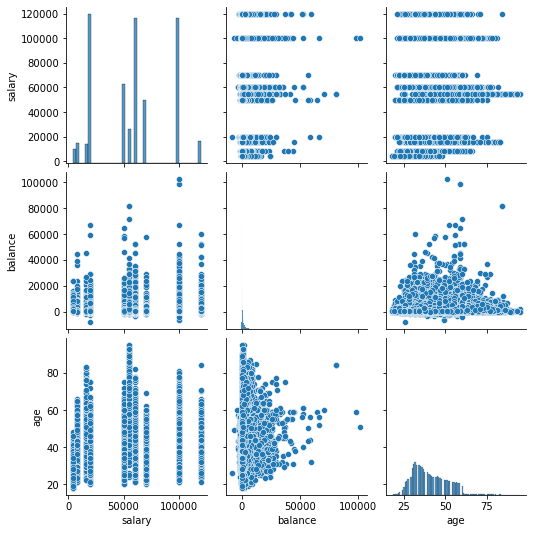

In [95]:
# Pair Plot
sns.pairplot(df[["salary","balance","age"]])
plt.show()

In [96]:
# Calcula a correlação
res = df[["salary", "balance", "age"]].corr()

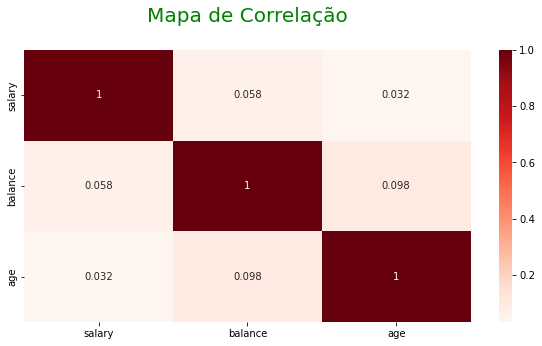

In [97]:
# Mapa de Correlação
plt.figure(figsize = (10,5))
sns.heatmap(res, annot = True, cmap = "Reds")
plt.title("Mapa de Correlação\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

### Numérico x Categórico

In [98]:
# Agrupa o salário pela variável resposta e calcula a média
df.groupby(by = ["response"])["salary"].mean()

response
no     57157.692886
yes    59157.556270
Name: salary, dtype: float64

In [99]:
# Agrupa o salário pela variável resposta e calcula a mediana
df.groupby(by = ["response"])["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

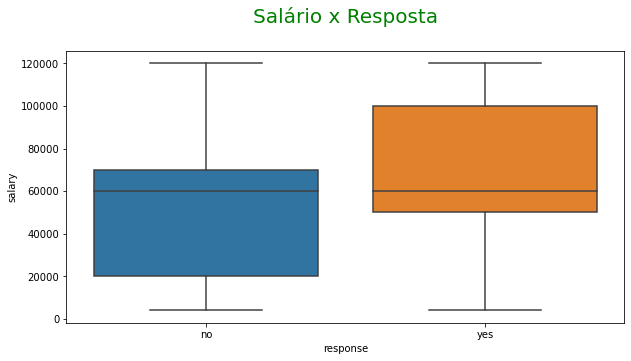

In [100]:
# Boxplot
plt.figure(figsize = (10,5))
sns.boxplot(df["response"], df["salary"])
plt.title("Salário x Resposta\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

In [101]:
# Agrupa educação por salário e calcula a média
df.groupby(by = ["education"])["salary"].mean()

education
primary      34697.106955
secondary    49922.420113
tertiary     83041.077340
unknown      50708.512931
Name: salary, dtype: float64

In [102]:
# Cria a variável response_flag como tipo numérico onde response "yes"= 1, "no"= 0
df["response_flag"] = np.where(df["response"] == "yes",1,0)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response,job,education,response_flag
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,0,unknown,no,management,tertiary,0
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,0,unknown,no,technician,secondary,0
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,0,unknown,no,entrepreneur,secondary,0
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,0,unknown,no,blue-collar,unknown,0
4,33,60000.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,0,unknown,no,unknown,unknown,0


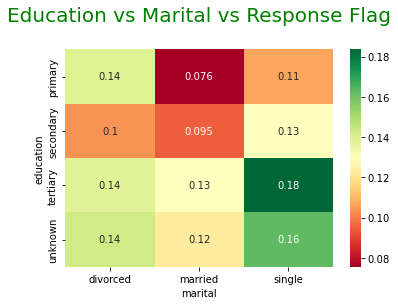

In [103]:
# Mapa de correlação
res1 = df.pivot_table(index = "education", columns = "marital", values = "response_flag", aggfunc = "mean")
sns.heatmap(res1, annot = True, cmap = "RdYlGn")
plt.title("Education vs Marital vs Response Flag\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

# Fim